# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

## Control exps

In [2]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\220310TUNNEL_220307exp_Mdc1TUNNEL\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [6]:
# load experiment exp2

#analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\2203087IF_220216exp_noco45h_Mdc1_H3T3_H3S10\cov2_H3S10\analysis_subset_controlled'

#exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

In [3]:
#ctrl_combined_df = pd.concat([exp1_df,exp2_df])
ctrl_combined_df =exp1_df

len(ctrl_combined_df)


#measurement_for_all_fov_df = ctrl_combined_df

130

In [21]:
#ctrl_combined_df.columns

# 3. Post-hoc analysis examples

In [4]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Revision_exps\Tunnel_analysis'

analysis_savename = 'mdc-568_Tunnel_analyzed.xlsx'

In [5]:
# The labeled histone mark in the excel

h2ax_key = 'Tunnel'


# the actual histone mark analyzed  (to correct the mis-labeling in the raw measurements)
actual_h2ax_key = 'Tunnel'

In [8]:
# Process each datafram

out_df_dict = {}
exp_name_list = ["Control"]

for _df_index, _df in enumerate([ctrl_combined_df]):
    print(f'analyzing experiment group {_df_index}.')
    
    # remove the bad cell that has no Pol2 signal
    analysis_df = _df.copy()
    print (f'-- There are {len(analysis_df)} data-points after filtering.')


    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df[f'normalized_inc_{actual_h2ax_key}'] = analysis_df[f'ave_intensity_incorporated_chr_{h2ax_key}']/analysis_df[f'ave_intensity_nucleo-excluded_control_chr_{h2ax_key}']
    print(analysis_df[f'normalized_inc_{actual_h2ax_key}'].mean())

    # for subset control
    analysis_df[f'normalized_subset_control_{actual_h2ax_key}']=analysis_df[f'ave_intensity_subset_control_chr_{h2ax_key}']/analysis_df[f'ave_intensity_nucleo-excluded_control_chr_{h2ax_key}']
    print(analysis_df[f'normalized_subset_control_{actual_h2ax_key}'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
    print(analysis_df['normalized_inc_Mdc1'].mean())

    # for subset control
    analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
    print(analysis_df['normalized_subset_control_Mdc1'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
    print(analysis_df['normalized_inc_dna'].mean())

    # for subset control
    analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
    print(analysis_df['normalized_subset_control_dna'].mean())
    
    out_df_key = exp_name_list[_df_index]
    out_df_dict[out_df_key]=analysis_df
    

analyzing experiment group 0.
-- There are 130 data-points after filtering.
-0.07035583439707614
2.6954934544118387
4.314534365625698
1.016479479695129
1.0961301476852734
1.042045535424522


In [9]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'
for _exp_key, _exp_df in out_df_dict.items():
    exp_analysis_savename = _exp_key+'_'+analysis_savename
    _exp_df.to_excel(os.path.join(analysis_save_path,exp_analysis_savename), index=False)

MW comparision: 0.36794421246039055


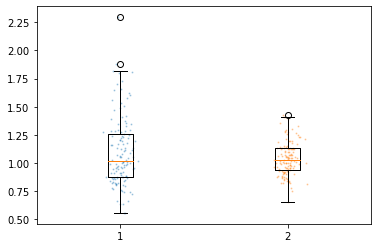

In [10]:
# for dna

# 
g1 = out_df_dict['Control']['normalized_inc_dna']
g2 = out_df_dict['Control']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)


boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.8969694345927247e-44


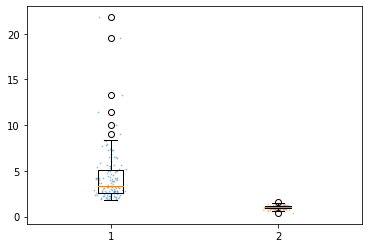

In [11]:
# for mdc1

g1 = out_df_dict['Control']['normalized_inc_Mdc1']
g2 = out_df_dict['Control']['normalized_subset_control_Mdc1']
#g3 = out_df_dict['HDACi']['normalized_inc_Mdc1']
#g4 = out_df_dict['HDACi']['normalized_subset_control_Mdc1']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 4.088451014190398e-09


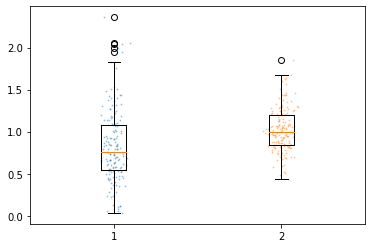

In [11]:
# For Pol2S5

g1 = out_df_dict['Control']['normalized_inc_Pol2S5']
g2 = out_df_dict['Control']['normalized_subset_control_Pol2S5']
#g3 = out_df_dict['HDACi']['normalized_inc_Pol2S5']
#g4 = out_df_dict['HDACi']['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 6.3247080885025725e-12


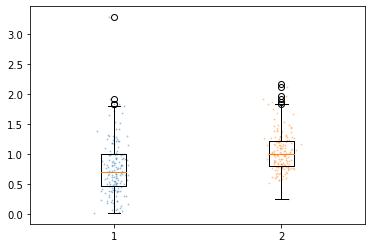

In [13]:
# For Pol2S5 norm to dna

g1 = (out_df_dict['Control']['normalized_inc_Pol2S5'])/(out_df_dict['Asy']['normalized_inc_dna'])
g2 = (out_df_dict['Control']['normalized_subset_control_Pol2S5'])/(out_df_dict['Asy']['normalized_subset_control_dna'])
#g3 = out_df_dict['HDACi']['normalized_inc_Pol2S5']/(out_df_dict['HDACi']['normalized_inc_dna'])
#g4 = out_df_dict['HDACi']['normalized_subset_control_Pol2S5']/(out_df_dict['HDACi']['normalized_subset_control_dna'])

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.007820179974327978


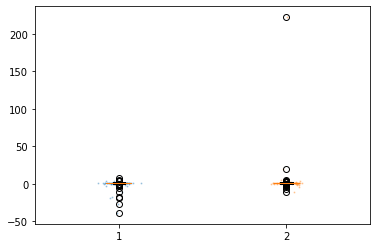

In [12]:
# For H2ax-key relevant Ab


g1 = (out_df_dict['Control'][f'normalized_inc_{actual_h2ax_key}'])
g2 = (out_df_dict['Control'][f'normalized_subset_control_{actual_h2ax_key}'])
#g3 = out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}']
#g4 = out_df_dict['HDACi'][f'normalized_subset_control_{actual_h2ax_key}']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 0.001776612111445658


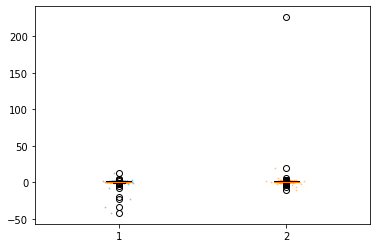

In [14]:
# For H2ax-key relevant Ab


g1 = (out_df_dict['Control'][f'normalized_inc_{actual_h2ax_key}'])/(out_df_dict['Control']['normalized_inc_dna'])
g2 = (out_df_dict['Control'][f'normalized_subset_control_{actual_h2ax_key}'])/(out_df_dict['Control']['normalized_subset_control_dna'])
#g3 = out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}']/(out_df_dict['HDACi']['normalized_inc_dna'])
#g4 = out_df_dict['HDACi'][f'normalized_subset_control_{actual_h2ax_key}']/(out_df_dict['HDACi']['normalized_subset_control_dna'])

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

In [16]:
from scipy import stats
stats.spearmanr(out_df_dict['Asy']['normalized_inc_Pol2S5'], out_df_dict['Asy'][f'normalized_inc_{actual_h2ax_key}'])

SpearmanrResult(correlation=0.8091087542482128, pvalue=2.595979942575651e-38)

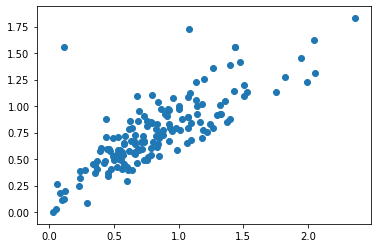

In [17]:
plt.scatter(x= out_df_dict['Asy']['normalized_inc_Pol2S5'], y =out_df_dict['Asy'][f'normalized_inc_{actual_h2ax_key}'])


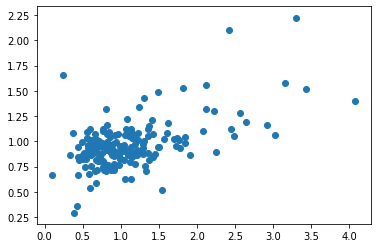

In [38]:
plt.scatter(x= out_df_dict['HDACi']['normalized_inc_Pol2S5'], y =out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}'])
